# Participation - Week 1
## CSCI 4622 - 2025 Fall

### (Using SKLearn to implement some of the tests from Problem Set 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.neighbors
import sklearn.datasets
import sklearn.metrics

First, we need a dataset to explore our classifier. We will use the baked-in SKLearn dataset creator "make_moons" to make interlocked crescent shapes.

For the purposes of a participation assignment, we need to strike a balance between reliability within execution cycles and uniqueness between students.

__STEP 1: Use the last 5 digits of your buffone card ID number as your random state seed in the following cell__

#TODO: Step 1, set your random seed.

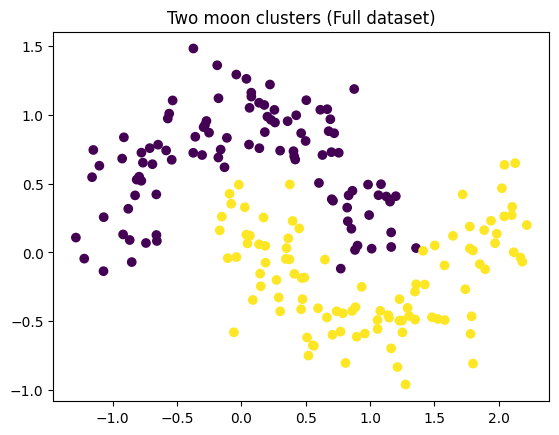

In [2]:
X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.19, random_state=44637) #TODO: Change random_state to the last 5 digits of your BuffOne card
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]
plt.title("Two moon clusters (Full dataset)")
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

We have data!

Now, let's set up a KNNClassifier class. We will use the K-Nearest Neighbors classifier class from *scikit-learn*:
- Initialize the classifier with corresponding parameters (number of neighbors k)
- Fit the classifier using the training data
- Predict the class of new points `X_test`

We've written out a lot of the structure for you so it will be consistent and we can use / reuse it, and you can focus on the "important" stuff that actually relates to the machine learning itself.

Below, we'll be using our KNNClassifier (sent in as "model") and the show_decision_surface function from the homework's helper file to show how we would predict any points in space given the input data.

In [3]:
def show_decision_surface(model):
    """
    Helper function to visualize the decision surface of model
    :param model: Initialized KNNClassifier
    :return: None
    """
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    x_grid = np.arange(x_min, x_max, 0.1)
    y_grid = np.arange(y_min, y_max, 0.1)
    xx, yy = np.meshgrid(x_grid, y_grid)
    r1, r2 = xx.reshape(-1,1), yy.reshape(-1,1)
    grid = np.hstack((r1,r2))
    y_hat = model.predict(grid)
    zz = y_hat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='PiYG')
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

__STEP 2.__ Try different values of k (at least 1 through 10) and report their accuracy on the test set in the following text box. Make sure to keep `random_state` set as your unique seed above so that the reported values don't change when code is re-run.

HINT: A loop might work well here.

(You can print out the full accuracy results programmatically in the code cell, but make sure they are labeled appropriately for full credit.)

_Unlike in the Problem Set, we are implementing SKLearn's Confusion Matrix and Confusion Matrix Display components._

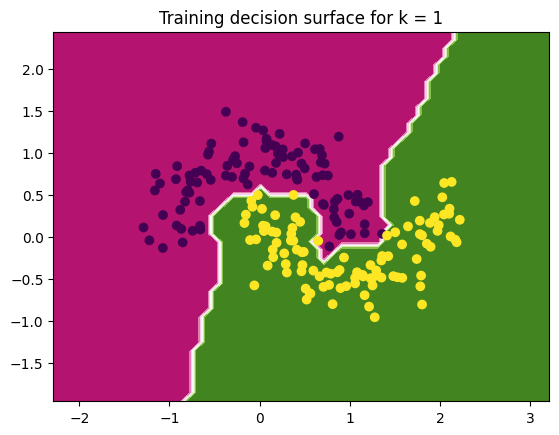

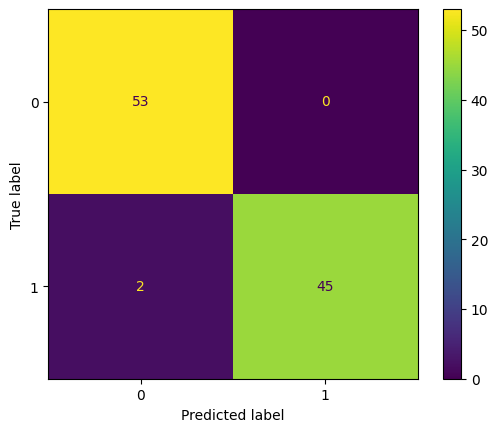

Accuracy score: 0.98


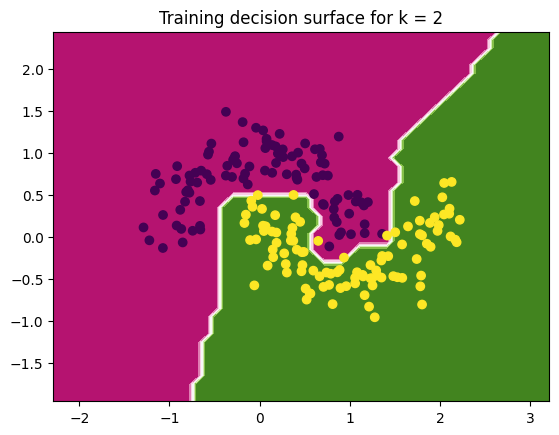

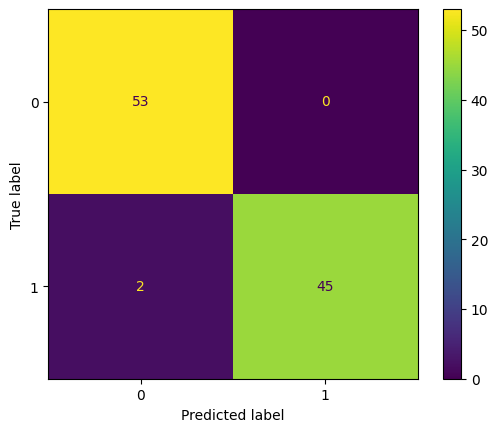

Accuracy score: 0.98


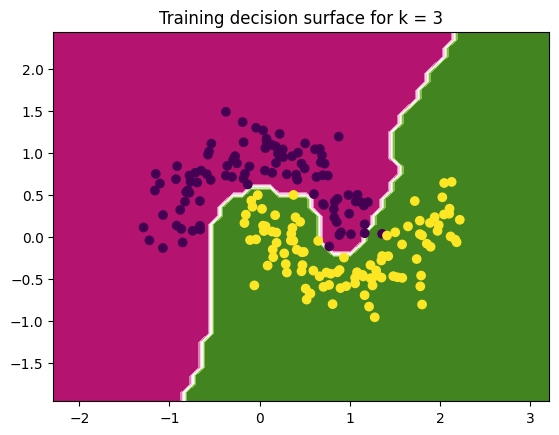

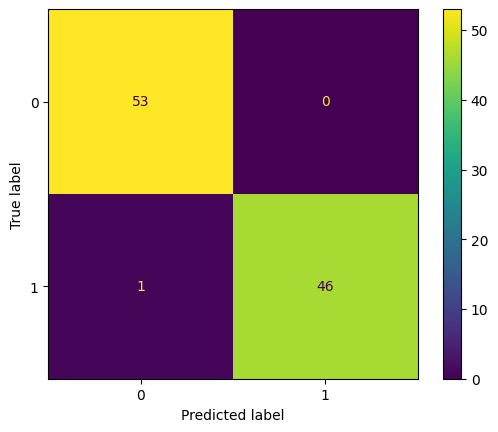

Accuracy score: 0.99


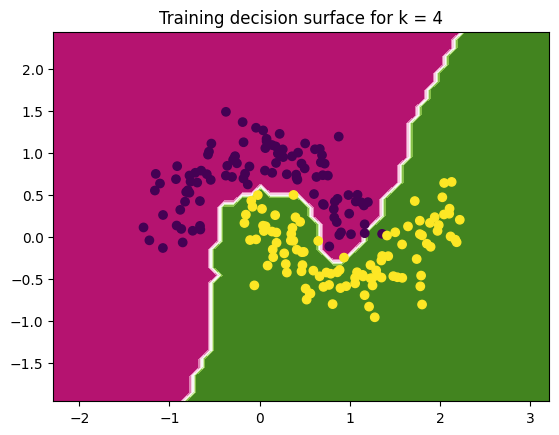

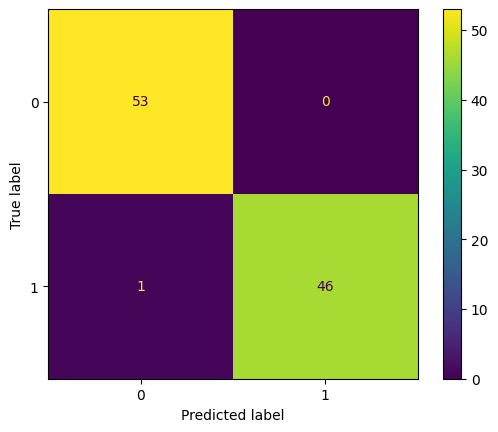

Accuracy score: 0.99


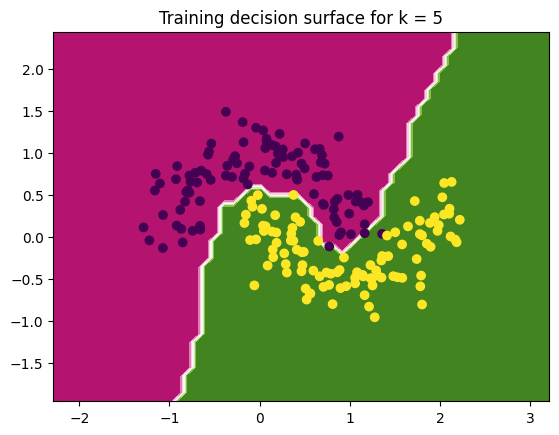

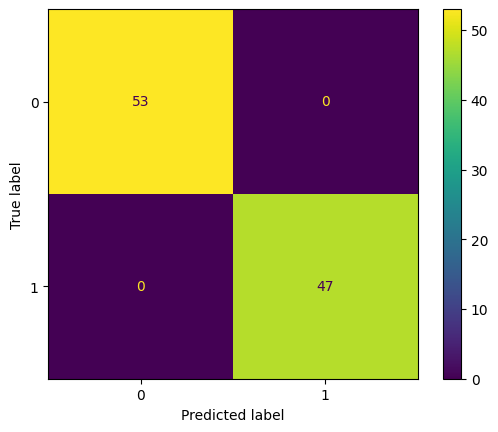

Accuracy score: 1.0


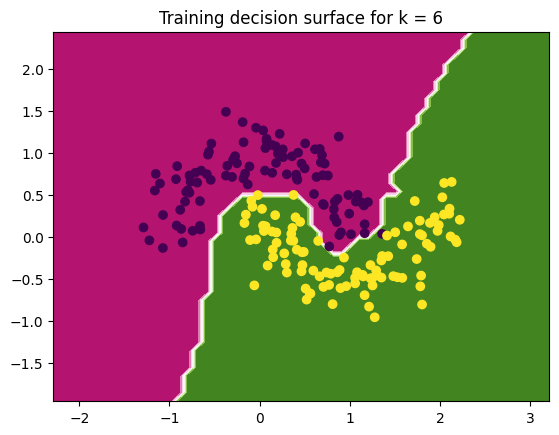

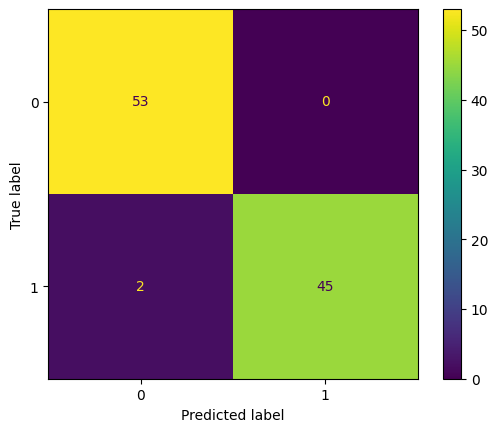

Accuracy score: 0.98


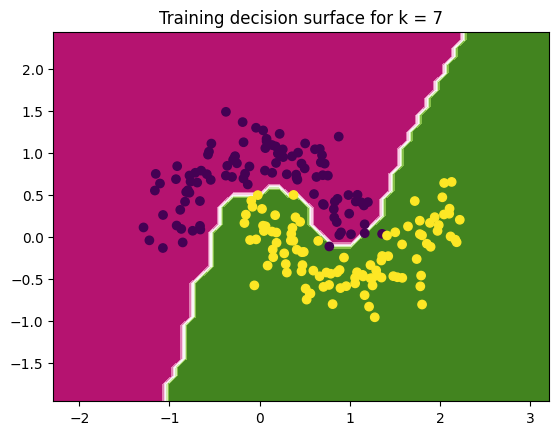

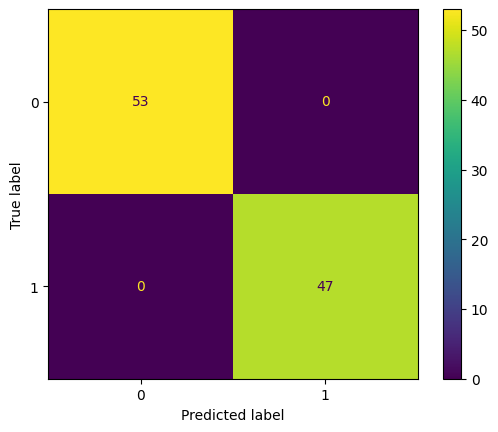

Accuracy score: 1.0


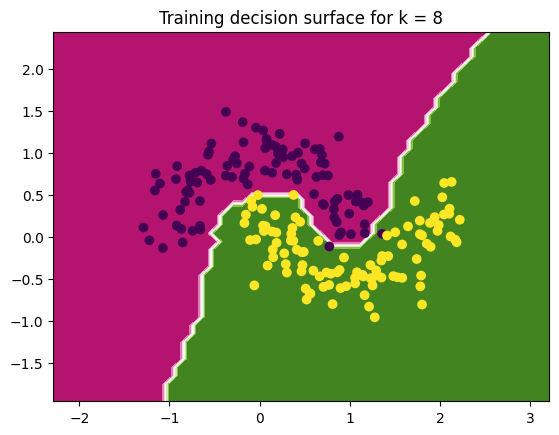

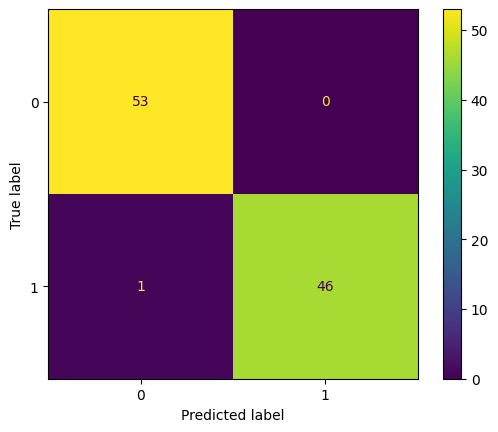

Accuracy score: 0.99


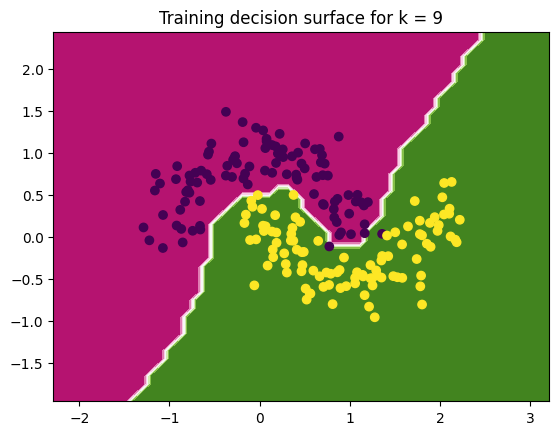

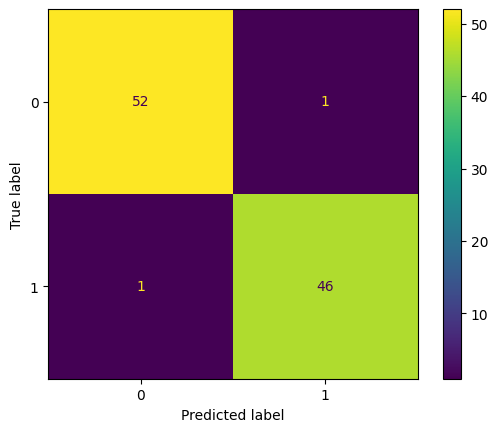

Accuracy score: 0.98


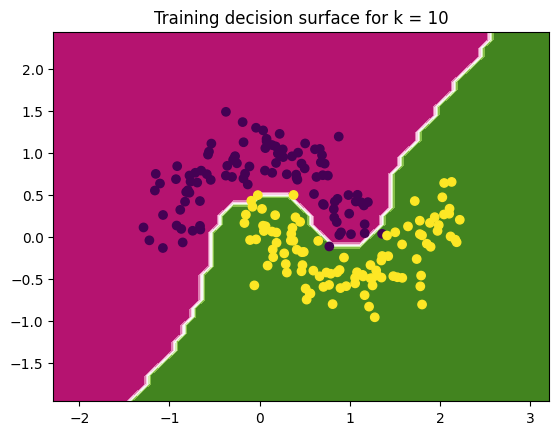

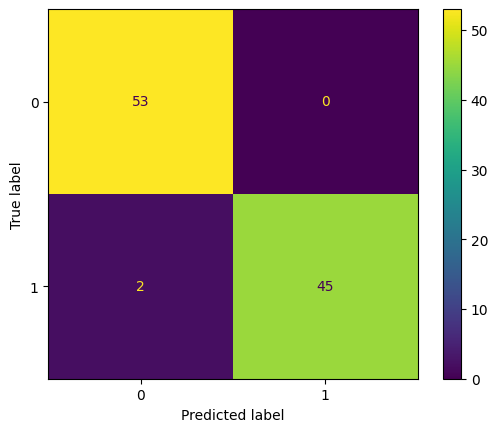

Accuracy score: 0.98


In [4]:
#TODO: Try different Ks
kk = list(range(1, 11))

for k in kk:
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    model = model.fit(X_train, y_train)
    plt.title("Training decision surface for k = {}".format(k))
    show_decision_surface(model)
    y_pred = model.predict(X_test)
    conf = sklearn.metrics.confusion_matrix(y_test, y_pred)
    disp = sklearn.metrics.ConfusionMatrixDisplay(conf)
    disp.plot()
    plt.show()

    print("Accuracy score:", sklearn.metrics.accuracy_score(y_test, y_pred))

#TODO: Step 2 Response, Report k=1 through k=10 accuracies.

I don't know if you run these Jupyter notebooks, but the above cell can be run to get all accuracies.

#### STEP 3 WRITEUP

1) Which K has the highest accuracy? What is that accuracy?

2) What is the distribution of false positives and false negatives for your best K?

#TODO: STEP 3 Response here

For my values both $k=5$ and $k=7$ turned out to be the most accurate, with the model giving them both a 1.0 accuracy rating.

For both of these k-values, their count of false positives and false negatives were both 0.